You can only use the libraries that have been provided to you. No other library use is allowed.

In [11]:
# No other libraries other than the given libraries are allowed.
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
terminal_states_4 = [5, 7, 11, 12] # Terminal states for 4 by 4 frozen lake environment
terminal_states_8 = [19, 29, 35, 41, 42, 46, 49, 52, 54, 59] # Terminal states for 8 by 8 frozen lake environment


LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

In [3]:
class RLTables:

    def __init__(self, map_size):
        self.map_size = map_size
        self.total_states = map_size * map_size
        self.goal_state = self.total_states - 1
        self.policy = []
        self.value_table = []
        self.q_table = [[]]
        self.reward = []

    def initialize_value_table(self):
        self.value_table = [0 for _ in range(self.total_states)]

        self.value_table = np.zeros(self.total_states)
        self.value_table[self.goal_state] = 1



    def initialize_q_table(self):

        self.q_table = np.zeros((self.total_states, 4))
        self.q_table[self.goal_state] = np.array([1, 1, 1, 1])





    def initialize_random_policy(self):


        self.policy = np.random.randint(0,3,self.total_states)

        for state in terminal_states_4: # Change this when you are solving for the 8 by 8 frozen lake environment.
            self.policy[state] = -1

        self.policy[self.goal_state] = -2


    def print_all_tables(self):

        print("Value Table")
        print(self.value_table)
        print("\nQ-Table")
        print(self.q_table)
        print("Policy")
        print(self.policy)
        print("Reward")
        print(self.reward)

    def get_tables(self):
        return self.policy, self.value_table, self.q_table, self.reward


    def initialize_reward(self):
        self.reward = np.zeros(self.total_states)
        self.reward[self.goal_state] = 1



    def initialize_all_tables(self):
        self.initialize_random_policy()
        self.initialize_value_table()
        self.initialize_q_table()
        self.initialize_reward()

In [4]:
class Plot(RLTables):
    def __init__(self, map_size):
        super().__init__(map_size)
        self.directions = {-2: "G", -1: " ", 0: "←", 1: "↓", 2: "→", 3: "↑"}

    def convert_policy_to_arrows(self):

        def replace_with_direction(num):
            return self.directions[num]

        vectorized_replace = np.vectorize(replace_with_direction)

        result_array = vectorized_replace(self.policy)

        return result_array

    def show_policy_table(self):
        arrow_based_policy = self.convert_policy_to_arrows()

        self.data = list(arrow_based_policy.reshape(self.map_size, self.map_size))

        # Create a figure and axis
        _, ax = plt.subplots()
        colors = plt.cm.BuPu(np.full((self.map_size, self.map_size), 0.1))


        self.table = ax.table(cellText=self.data, loc='center', cellLoc='center', colLabels=None, cellColours=colors)

        if self.map_size == 4:
                self.table.scale(0.6, 4)
        elif self.map_size == 8:
                self.table.scale(0.5, 2)

        # Hide axis
        ax.axis('off')

        # Customize cell properties (optional)
        self.table.auto_set_font_size(False)
        self.table.set_fontsize(25)
        self.table.scale(1.5, 1.5)  # Adjust cell size as needed
        ax.axis('off')  # Turn off the axis

    def show_value_table(self):



        self.show_policy_table()

        if self.map_size == 8:
            self.table.set_fontsize(10)

        for i in range(self.map_size):
                    for j in range(self.map_size):

                            cell_text = self.data[i][j]

                            if cell_text == " " or cell_text == "G":
                                    continue

                            cell = self.table[i, j]

                            number_text = str(round( self.value_table[self.map_size*i + j], 2))
                            full_text = cell_text + '\n' + number_text
                            cell.get_text().set_text(full_text)


    def show_q_table(self):

        self.show_policy_table()

        if self.map_size == 4:
            self.table.set_fontsize(10)
        elif self.map_size == 8:
            self.table.set_fontsize(5)



        for i in range(self.map_size):
                        for j in range(self.map_size):

                                cell_text = self.data[i][j]

                                if cell_text == " " or cell_text == "G":
                                        continue


                                cell = self.table[i, j]

                                number_text2 = str(round( self.q_table[self.map_size*i + j][0], 2))
                                number_text4 = str(round( self.q_table[self.map_size*i + j][1], 2))
                                number_text3 = str(round( self.q_table[self.map_size*i + j][2], 2))
                                number_text1 = str(round( self.q_table[self.map_size*i + j][3], 2))

                                full_text = number_text1 + "\n\n" + number_text2 + "  " + cell_text + "  " + number_text3 + "\n\n" + number_text4

                                cell.get_text().set_text(full_text)


    def show_all_tables(self):
        self.show_policy_table()
        self.show_value_table()
        self.show_q_table()



The RLTables class initializes all the tables you will need. You need to find the correct policy, value table and qtable. The Plot Class inherits from RLTables. It makes for an easy visualization tool that you can use to visualize these tables.

In [6]:
# Here I have showed a basic usage of the classes.

rl = RLTables(map_size=4) # You can change map_size to 8 when solving for the 8 by 9 environment.
rl.initialize_all_tables()
rl.print_all_tables()

Value Table
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Q-Table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]]
Policy
[ 1  2  2  1  2 -1  1 -1  2  1  0 -1 -1  0  1 -2]
Reward
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


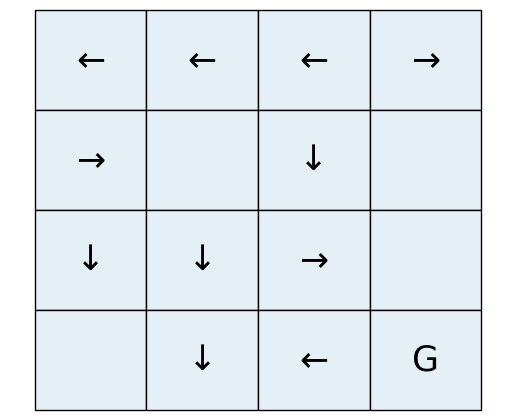

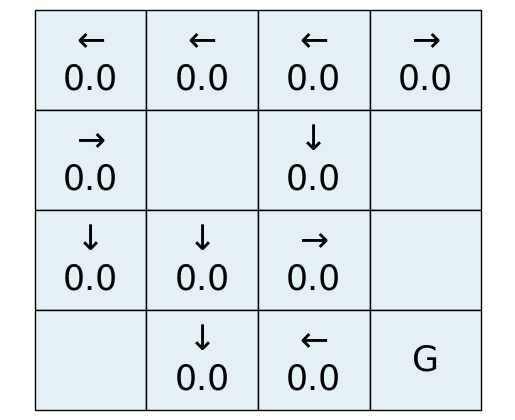

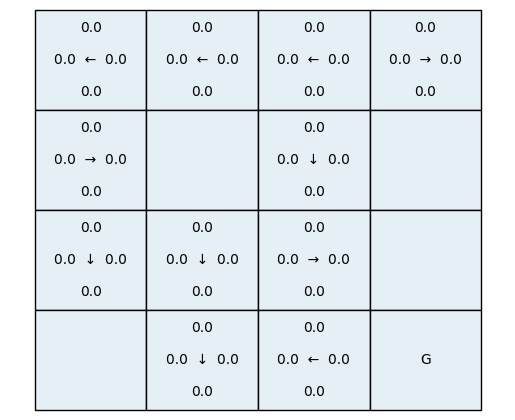

In [8]:
plot = Plot(map_size=4)
plot.initialize_all_tables()
plot.show_all_tables()

The Policy is randomly initialized. There are no algorithms implemented for this and so value table and qtable are initialized to 0.

https://gymnasium.farama.org/environments/toy_text/frozen_lake/

The above link contains all you need to know about the environment.

Good Luck for the assignment! If you want any help, you can ask for help from the instructor or Mahen Mughal on Slack.

**a)** Find the optimal policy, value table and q table for both frozen lake 4 by 4 environments using  

    i) Policy Iteration  
    ii) Value Iteration  

**b)** Perform part a on 8 by 8 frozen lake environment  

**c)** Find success rate on 100000 iterations for the optimal policy for both 4 by 4 environment and 8 by 8 environment.  

**d)** Do you think this should be the success rate for the 8 by 8 environment. If not, why not?
